In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
datadir = 'C:/Users/Vishaak/Downloads/face_mask/Dataset'
img_size = 256
training_data = []

def create_training_data():
    categories = ["without_mask","with_mask"]
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        count = 0
        if(class_num == 0):
            for img in os.listdir(path):
                if(count<1800):
                    try:
                        img_array = cv2.imread(os.path.join(path,img))
                        new_array = cv2.resize(img_array,(img_size,img_size))
                        training_data.append([new_array,class_num])
                        count+=1
                    except Exception as e:
                        pass
        else:
            for img in os.listdir(path):
                if(count<1000):
                    try:
                        img_array = cv2.imread(os.path.join(path,img))
                        new_array = cv2.resize(img_array,(img_size,img_size))
                        training_data.append([new_array,class_num])
                        count+=1
                    except Exception as e:
                        pass

create_training_data()
len(training_data)

2800

In [3]:
import random 

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

1
0
0
0
0
0
1
0
1
1


In [4]:
x = []
y = []

for image,label in training_data:
    x.append(image/256)
    y.append(label)

x = np.array(x)
y = np.array(y)



In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

x = x.reshape(-1,img_size,img_size,3)

model = Sequential()

model.add(Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu', input_shape = x.shape[1:]))
model.add(Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu'))
model.add(Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

model.fit(x,y, batch_size = 20, epochs=4, validation_split=0.1)


Epoch 1/4
126/126 [==============================] - 880s 7s/step - loss: 0.2297 - accuracy: 0.9238 - val_loss: 0.1197 - val_accuracy: 0.9607
Epoch 2/4
126/126 [==============================] - 801s 6s/step - loss: 0.1366 - accuracy: 0.9619 - val_loss: 0.2108 - val_accuracy: 0.9464
Epoch 3/4
126/126 [==============================] - 860s 7s/step - loss: 0.1137 - accuracy: 0.9671 - val_loss: 0.1240 - val_accuracy: 0.9643
Epoch 4/4
126/126 [==============================] - 838s 7s/step - loss: 0.1117 - accuracy: 0.9663 - val_loss: 0.1275 - val_accuracy: 0.9571


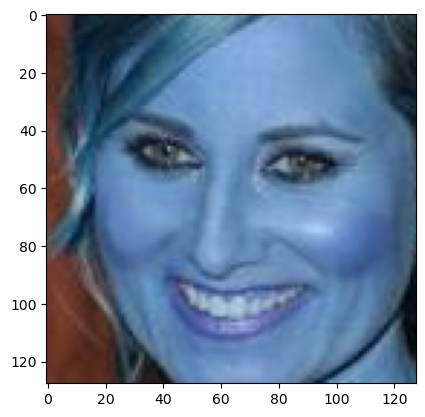

In [6]:
test_path = os.path.join('C:/Users/Vishaak/Downloads/face_mask/Dataset/without_mask','2009.png')
test_img = cv2.imread(test_path)
plt.imshow(test_img)

In [7]:
test_img = cv2.resize(test_img, (img_size,img_size))
t_img = test_img.reshape(-1,img_size,img_size,3)
model.predict(t_img)

1/1 [==============================] - 1s 718ms/step


array([[0.]], dtype=float32)

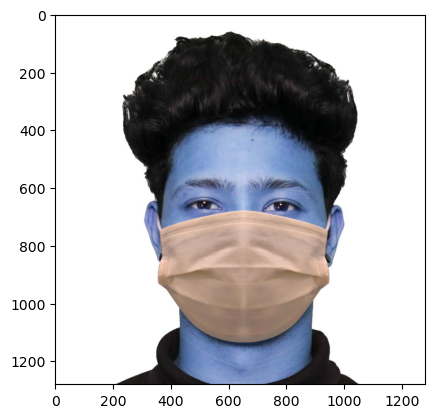

In [8]:
test_path_2 = os.path.join('C:/Users/Vishaak/Downloads','mask_test_1.jpg') 
test_img_2 = cv2.imread(test_path_2)
plt.imshow(test_img_2)

In [9]:
test_img_2 = cv2.resize(test_img_2,(img_size,img_size))
t_img_2 = test_img_2.reshape(1,img_size,img_size,3)
model.predict(t_img_2)

1/1 [==============================] - 0s 294ms/step


array([[1.]], dtype=float32)

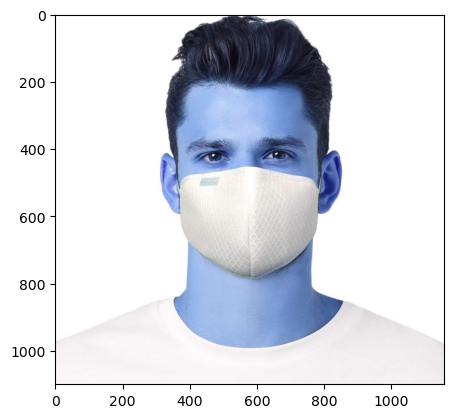

In [10]:
test_path_2 = os.path.join('C:/Users/Vishaak/Downloads','mask_test_2.jpg') 
test_img_2 = cv2.imread(test_path_2)
plt.imshow(test_img_2)

In [11]:
test_img_2 = cv2.resize(test_img_2,(img_size,img_size))
t_img_2 = test_img_2.reshape(1,img_size,img_size,3)
model.predict(t_img_2)

1/1 [==============================] - 0s 229ms/step


array([[1.]], dtype=float32)

In [12]:
model.save("mask_detector.model")

INFO:tensorflow:Assets written to: mask_detector.model\assets


INFO:tensorflow:Assets written to: mask_detector.model\assets
